# Lab Segmentation 1

In [22]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


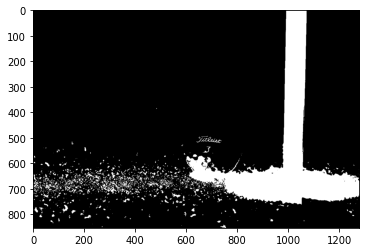

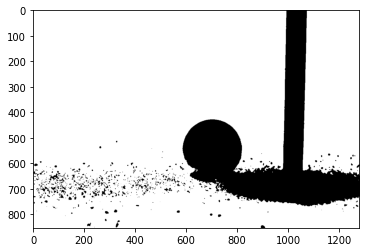

In [26]:
## For all requirements: The quality of the results is evaluated.


# 1- Read the image 
# [VERY IMPORTANT] and convert it to float: image = image.astype(float)

# read image golf
img = io.imread('imgs/exp1/golf.jpeg')
img = img.astype(float)
img /= 255.0


# 2- Retreive the 3 channels of the image(R,G,B) (will be used in the coming steps)
red = img[:, :, 0]
green = img[:, :, 1]
blue = img[:, :, 2]
# 3- Visually (not by code) detect the dominating color channel (C) for the backgroung (R, G or B)
#! Green
# 4- Draw the dominating channel (r, g or b) thresholded by some threshold (to make sure your choice is meaningful)
new_green = green.copy()
threshold = 0.4
new_green[green > threshold] = 0
new_green[green <= threshold] = 1
show_images([new_green], [''])

# 5- Get an intuitive way(There is a very simple way) to make a mask that can get the pixels where the values of the dominating channels 
# have larger values than the other channels with an appropriate threshold
threshold2 = 0.1
new_image = green.copy()
new_image[np.logical_and(green > red + threshold2, green > blue + threshold2)] = 1
new_image[np.logical_or(green <= red + threshold2, green <= blue + threshold2)] = 0

show_images([new_image], [''])

# 6- display the binarized image






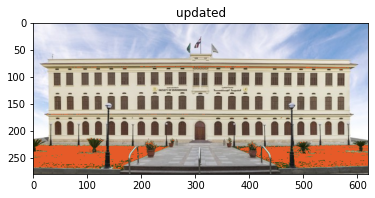

In [28]:
# 1- Get the required RGB color (Using a color picker)


img = io.imread('imgs/exp2/cufe.png')
img = img.astype(float)
# img /= 255.0

# 2- Read image

# 3- extract R, G and B channels (as float)
red = img[:, :, 0]
green = img[:, :, 1]
blue = img[:, :, 2]

# 4- calculate differences FOR EACH CHANNEL (between the image and the required pixel value)
target_color = (83, 105, 34)
red = red - target_color[0]
green = green - target_color[1]
blue = blue - target_color[2]

# 5- calculate overall distance from the given RGB color (use any appropriate distance measure, take care of the minus distances)
distance = np.sqrt(red**2 + green**2 + blue**2)
# 6-  create a mask by thresholding the differences
threshold = 35
# 7- In the input image, Replace the pixels of the mask with the following color
# R = 230 , G = 90 , B=40
img[distance < threshold] = np.array([230, 90, 40])
img = img.astype(np.uint8)
# 8- show the image or save it

show_images([img],["updated"])
